In [1]:
#importing libraries
#pandas (data manipulation and analysis), scikit-learn (machine learning library), seaborn and matplotlib (data visualization).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

In [18]:
#loading dataset and reading the CSV file and viewing the first lines of the table
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#looking at the NaN information for each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#Following the modeling assumptions, we cannot proceed to the next step with missing data, so I chose to exclude the Cabin variable, and keep the Age and Embarked variables, in order to perform some type of treatment afterwards.
#The PassengerId variable is a unique ID for each customer, and it only helps us to carry out a passenger identification, not bringing information gain to the model.
#Regarding the Ticket variable, I understand that we can use it to build other variables. However, as this process will be laborious, in this first moment, I also choose to remove it from the model.
df = df.drop(['Cabin','PassengerId','Ticket'], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [24]:
#When looking at the information in the Name column, we noticed that the terms “Mr.”, “Mrs.”, “Miss”, “Ms” and “Master” are mentioned. Looking for the meaning of each term we have:
#Miss: Single women
#Mrs .: Married women
#Mr .: Man
#Master .: Children
df['Mrs'] = df['Name'].str.contains('Mrs. ').replace(True,1)
df['Mr'] = df['Name'].str.contains('Mr. ').replace(True,1)
df['Master'] = df['Name'].str.contains('Master. ').replace(True,1)
df['Miss'] = df['Name'].str.contains('Miss. ').replace(True,1)
df = df.drop(['Name'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Mrs,Mr,Master,Miss
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0


In [25]:
#The columns Pclass, Sex and Embarked are dimensions and not measured, so we need to transform them into dummy variables.
dummies_sex = pd.get_dummies(df['Sex'])
df = pd.concat([df,dummies_sex],axis=1)
dummies_sex = pd.get_dummies(df['Embarked'])
df = pd.concat([df,dummies_sex],axis=1)
dummies_sex = pd.get_dummies(df['Pclass'])
df = pd.concat([df,dummies_sex],axis=1)
df = df.drop(['Sex','Embarked','Pclass'], axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare,Mrs,Mr,Master,Miss,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,0,1,0,0,1,0,0,1


In [26]:
#Now let’s do the treatment and fill it out. For this, we will use the average per category that we obtain through the Name variable (Mrs, Mr, Master and Miss).
df.loc[df['Master'] == 1, 'Age'] = df[df.Master == 1].Age.fillna(df[df.Master == 1].Age.mean())
df.loc[df['Miss'] == 1, 'Age'] = df[df.Miss == 1].Age.fillna(df[df.Miss == 1].Age.mean())
df.loc[df['Mrs'] == 1, 'Age'] = df[df.Mrs == 1].Age.fillna(df[df.Mrs == 1].Age.mean())
df.loc[df['Mr'] == 1, 'Age'] = df[df.Mr == 1].Age.fillna(df[df.Mr == 1].Age.mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,Survived,Age,SibSp,Parch,Fare,Mrs,Mr,Master,Miss,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,0,1,0,0,1,0,0,1


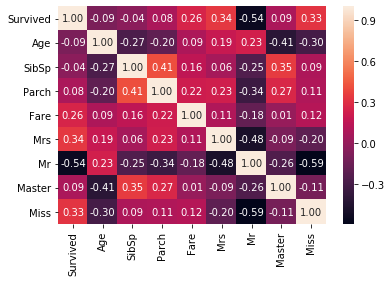

In [43]:
#we can analyze the correlation of the explanatory variables with the response variable, with that, we can already have an idea of which variables we should prioritize in the model.
sns.heatmap(df[['Survived','Age','SibSp','Parch','Fare','Mrs','Mr','Master','Miss']].corr(), annot=True, fmt='.2f')

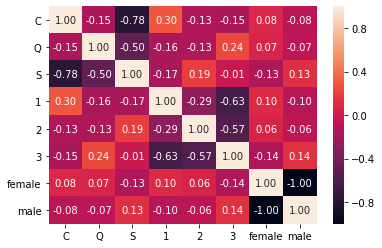

In [45]:
sns.heatmap(df[['C','Q','S',1,2,3,'female','male']].corr(), annot=True, fmt='.2f')

In [46]:
#then we do the split, which is the division of our training and test base to evaluate after the model result . In our case, we separated 70% for training the model and 30% to perform the test later.
X = df[['Age','SibSp','Parch','Fare','Mrs','Mr','Master','Miss','C','Q','S',1,2,3,'female','male']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

In [55]:
#The model that was chosen is the Logistic Regression, summarizing the logistic regression models the probability of Y belonging to a particular category, in our case it is whether the passenger survived or not.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
#In our first challenge we chose an accuracy of 87%, and when we look at the f1-score (weighted average of precision and recall) we had 80% assertiveness in survivors and 90% in non-survivors.
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       178
           1       0.81      0.78      0.80        90

    accuracy                           0.87       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.86      0.87      0.86       268



In [ ]:
#preparing the base to load on the kaggle platform
X_test = df[['Age','SibSp','Parch','Fare','Mrs','Master','Mr',1,3,'Female_Master']]
y_pred = logreg.predict(X_test)

In [ ]:
df['Survived'] = y_pred

In [ ]:
df[['PassengerId','Survived']].to_csv('gender_submission.csv', index=False)